In [1]:
#!/usr/bin/env python3
import pandas as pd
#!pip install sqlalchemy
from sqlalchemy import create_engine
#!pip install psycopg2-binary
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='sqlalchemy')
# Connexion à la base de données MySQL
USER = 'root'
PASSWORD = 'rootroot' 
HOST = '127.0.0.1'
PORT = '3306'
DATABASE = 'credit_risk_db'

try:
    # Création de l'URL de connexion
    engine_url = f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
    engine = create_engine(engine_url)
    print("Connexion réussie à la base de données MySQL.")
    # Exemple de requête pour vérifier la connexion
    query = "SELECT * FROM loans"
    # Chargement des données dans un DataFrame pandas
    df = pd.read_sql(query, con=engine)
    # Affichage des premières lignes du DataFrame
    display(df.head())
    
except Exception as e:
    print(f"Erreur de connexion à la base de données MySQL: {e}")
    

Connexion réussie à la base de données MySQL.


,id,loan_amount,interest_rate,term_months,start_date,end_date,borrower_age,borrower_income,credit_score,defaulted,is_simulated_anomaly
0,1,16795,0.1441,36,2024-02-01,2027-01-16,25,130268,320,1,0
1,2,38194,0.0851,60,2024-08-03,2029-07-08,53,80263,430,1,0
2,3,1769,0.1166,24,2025-10-01,2027-09-21,38,103104,759,0,0
3,4,72932,0.0818,12,2025-08-31,2026-08-26,44,45658,810,1,0
4,5,3747,0.0740,36,2023-09-03,2026-08-18,61,76886,543,0,0


In [2]:
# Informations sur le DataFrame
df.info()
# Vérification des valeurs manquantes
print(f"\nValeurs manquantes : {df.isnull().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75000 non-null  int64  
 1   loan_amount           75000 non-null  int64  
 2   interest_rate         75000 non-null  float64
 3   term_months           75000 non-null  int64  
 4   start_date            75000 non-null  object 
 5   end_date              75000 non-null  object 
 6   borrower_age          75000 non-null  int64  
 7   borrower_income       75000 non-null  int64  
 8   credit_score          75000 non-null  int64  
 9   defaulted             75000 non-null  int64  
 10  is_simulated_anomaly  75000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 6.3+ MB

Valeurs manquantes : 0


In [3]:
# Statistiques descriptives
display(df.describe())

,id,loan_amount,interest_rate,term_months,borrower_age,borrower_income,credit_score,defaulted,is_simulated_anomaly
count,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,7.500000e+04,75000.00000,75000.000000,75000.000000
mean,37500.500000,36936.500987,0.097585,36.06176,43.435093,1.203926e+05,574.05100,0.368613,0.048840
std,21650.779432,23041.578988,0.080026,16.98323,14.999925,3.436365e+05,158.43894,0.482432,0.215535
min,1.000000,-74997.000000,0.030000,12.00000,18.000000,2.000000e+04,300.00000,0.000000,0.000000
25%,18750.750000,18648.500000,0.060300,24.00000,30.000000,5.258500e+04,437.00000,0.000000,0.000000
50%,37500.500000,37407.500000,0.090500,36.00000,43.000000,8.553100e+04,573.00000,0.000000,0.000000
75%,56250.250000,56233.500000,0.121100,48.00000,56.000000,1.188912e+05,711.00000,1.000000,0.000000
max,75000.000000,74999.000000,0.999800,60.00000,69.000000,4.999737e+06,849.00000,1.000000,1.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style de seaborn
sns.set(style="whitegrid")

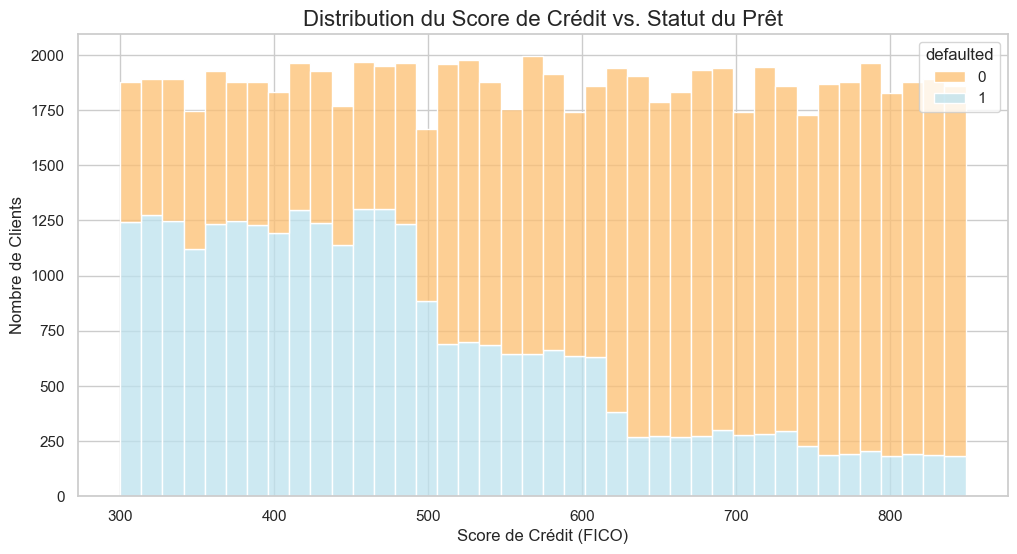

In [5]:
# Visualisation de la distribution du score de crédit en fonction du statut du prêt
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='credit_score', hue='defaulted', 
             multiple='stack', bins=40, palette='RdYlBu')
plt.title('Distribution du Score de Crédit vs. Statut du Prêt', fontsize=16)
plt.xlabel('Score de Crédit (FICO)')
plt.ylabel('Nombre de Clients')
plt.show()